# Notebook to Visualize Positions of Egyptian Decans with decanOpy

Everything is better with Python. 

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os 

## Example of Data Processing

In [14]:
### Set the directory

direct = os.getcwd() # current working directory
ditect = direct + '/DecanLists' # directory where the .txt files go

### Determine the filenames

Sirius_filename = ['Sirius011300BC.txt']
Orion_filename = ['Rigel011300BC.txt', 'Betelgeuse011300BC.txt']
Dipper_filename = ['Alkaid011300BC.txt', 'Alioth011300BC.txt', 'Merak011300BC.txt']

### Import sun + decan data

# Sirius
(jd, date, SiriusAz, SiriusAlt, SunAz, SunAlt) = ImportDecanData(direct, Sirius_filename[0])
# Orion
(RigelAz, RigelAlt) = JustDecanData(direct, Orion_filename[0])
(BetAz, BetAlt) = JustDecanData(direct, Orion_filename[1])
# Big Dipper
(AlkaidAz, AlkaidAlt) = JustDecanData(direct, Dipper_filename[0])
(AliothAz, AliothAlt) = JustDecanData(direct, Dipper_filename[1])
(MerakAz, MerakAlt) = JustDecanData(direct, Dipper_filename[2])


### Sunrise & Sunset Times
sunriseset = SunRiseSet(jd, SunAlt)


### Calculate maximum and minimum altitudes 

# Sirius
(days, SirMinAz, SirMaxAz, SirMinAz, SirMaxAlt, SirRiseAz, SirSetAz, SirRiseAlt, SirSetAlt) = MaxMinAltAz(direct, Sirius_filename[0], jd, sunriseset)
# Orion
(days, RigMinAz, RigMaxAz, RigMinAz, RigMaxAlt, RigRiseAz, RigSetAz,  RigRiseAlt, RigSetAlt) = MaxMinAltAz(direct, Orion_filename[0], jd, sunriseset)
(days, BetMinAz, BetMaxAz, BetMinAz, BetMaxAlt, BetRiseAz, BetSetAz,  BetRiseAlt, BetSetAlt) = MaxMinAltAz(direct, Orion_filename[1], jd, sunriseset)
# Big Dipper
(days, AlkMinAz, AlkMaxAz, AlkMinAz, AlkMaxAlt, AlkRiseAz, AlkSetAz, AlkRiseAlt, AlkSetAlt) = MaxMinAltAz(direct, Dipper_filename[0], jd, sunriseset)
(days, AliMinAz, AliMaxAz, AliMinAz, AliMaxAlt, AliRiseAz, AliSetAz, AliRiseAlt, AliSetAlt) = MaxMinAltAz(direct, Dipper_filename[1], jd, sunriseset)
(days, MerMinAz, MerMaxAz, MerMinAz, MerMaxAlt, MerRiseAz, MerSetAz, MerRiseAlt, MerSetAlt) = MaxMinAltAz(direct, Dipper_filename[2], jd, sunriseset)



## Plotting Examples

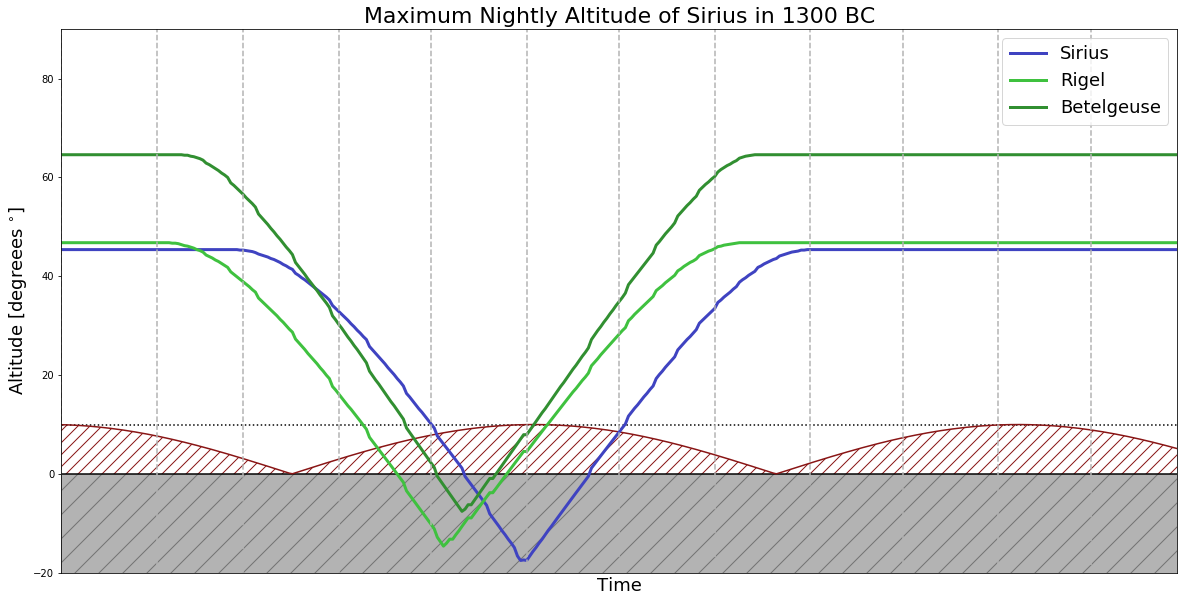

In [17]:
plt.figure(figsize=(20,10))

plt.hlines(0, 0, 366)
plt.hlines(10, 0, 366, linestyle = ':')

xdays = np.arange(1, len(SirMaxAlt)+1)
y1 = np.abs(10 * np.sin(0.02 * xdays + 29.9))

# this makes the "mountain" effect
plt.plot(xdays, y1, color="#891515")
plt.fill_between(xdays, 0, y1,  facecolor="none", hatch="//", edgecolor="#891515", linewidth=0.0)
plt.fill_between(xdays, -30, 0, facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)

plt.plot(xdays, SirMaxAlt,  linewidth=3.0, color = '#3F43C1', label = 'Sirius')

plt.plot(xdays, RigMaxAlt,  linewidth=3.0, color = '#3FC13F', label = 'Rigel')
plt.plot(xdays, BetMaxAlt,  linewidth=3.0, color = '#318F31', label = 'Betelgeuse')

# month lines
xcoords = np.cumsum([1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # vertical month lines
for xc in xcoords:
    plt.axvline(x=xc, linestyle = '--', color='0.7' )
# no x-label
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# niceties
plt.title('Maximum Nightly Altitude of Sirius in 1300 BC', fontsize=22)    
plt.ylabel(r'Altitude [degreees $^{\circ}$]', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(1, 363)
plt.ylim(-20, 90)
plt.legend(fontsize = 18)
plt.show()

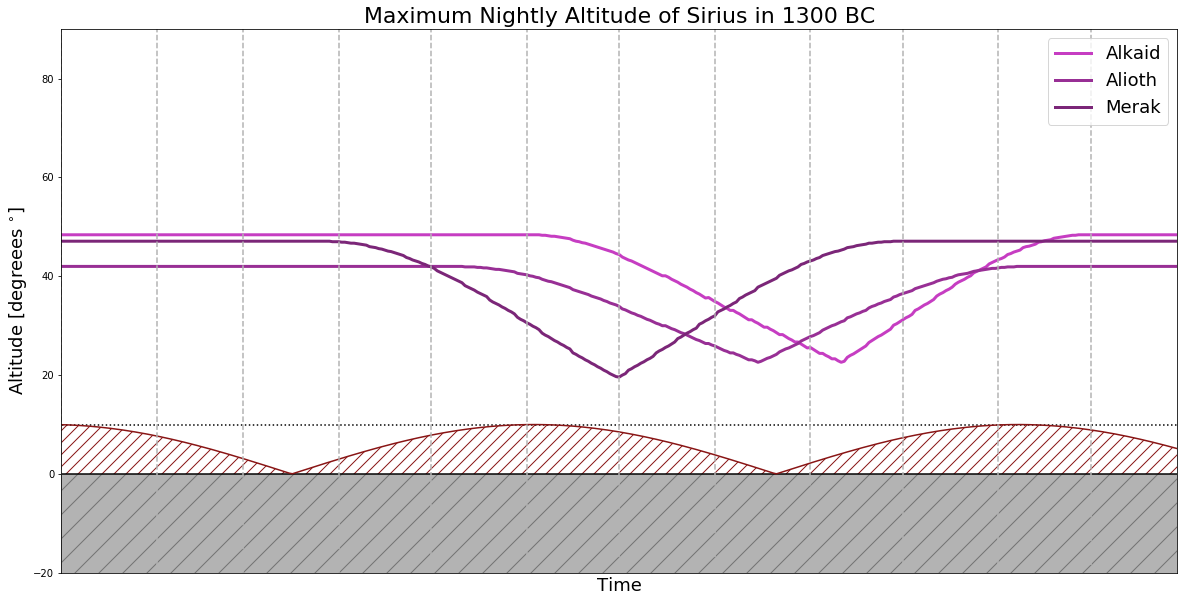

In [18]:
plt.figure(figsize=(20,10))

plt.hlines(0, 0, 366)
plt.hlines(10, 0, 366, linestyle = ':')

xdays = np.arange(1, len(SirMaxAlt)+1)
y1 = np.abs(10 * np.sin(0.02 * xdays + 29.9))

# this makes the "mountain" effect
plt.plot(xdays, y1, color="#891515")
plt.fill_between(xdays, 0, y1,  facecolor="none", hatch="//", edgecolor="#891515", linewidth=0.0)
plt.fill_between(xdays, -30, 0, facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)

# this plots the data
plt.plot(xdays, AlkMaxAlt,  linewidth=3.0, color = '#C63DC2', label = 'Alkaid')
plt.plot(xdays, AliMaxAlt,  linewidth=3.0, color = '#982F95',  label = 'Alioth')
plt.plot(xdays, MerMaxAlt,  linewidth=3.0, color = '#7B2678',  label = 'Merak')

# month lines
xcoords = np.cumsum([1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # vertical month lines
for xc in xcoords:
    plt.axvline(x=xc, linestyle = '--', color='0.7' )
# no x-label
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# niceties
plt.title('Maximum Nightly Altitude of Sirius in 1300 BC', fontsize=22)    
plt.ylabel(r'Altitude [degreees $^{\circ}$]', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(1, 363)
plt.ylim(-20, 90)
plt.legend(fontsize = 18)
plt.show()

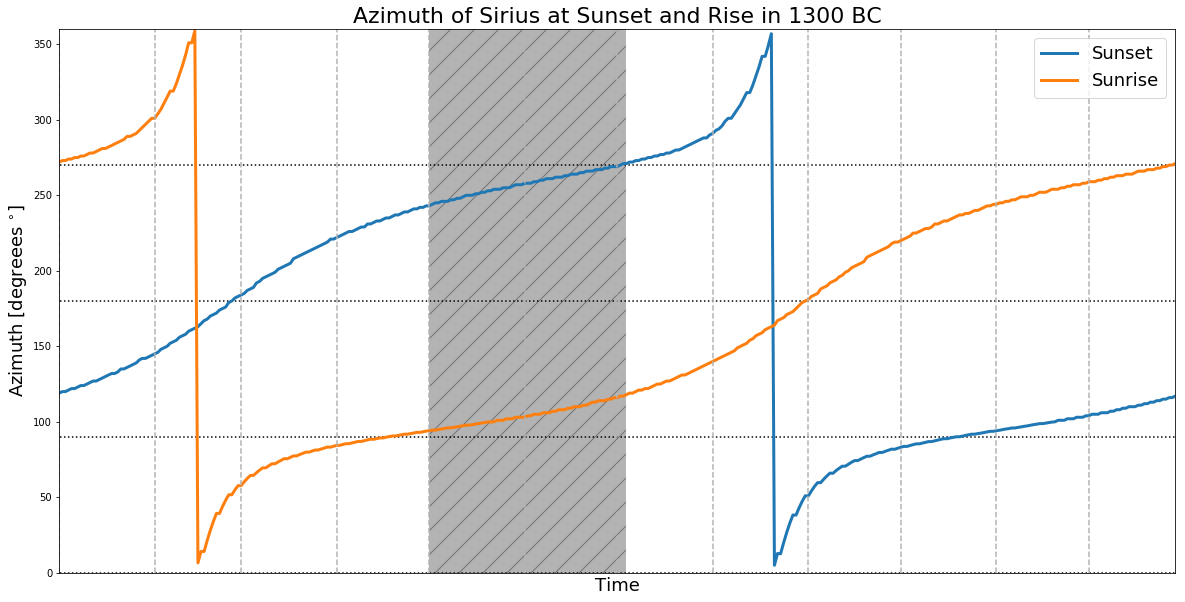

In [266]:
plt.figure(figsize=(20,10))

plt.plot(xdays, SirSetAz,  linewidth=3.0, label = 'Sunset')
plt.plot(xdays, SirRiseAz,  linewidth=3.0, label = 'Sunrise')


# NESW LINES
ycoords = np.cumsum([-360, 90, 90, 90, 90, 90, 90, 90])
for yc in ycoords:
    plt.hlines(yc, 0, 366, linestyle = ':')

# month lines
xcoords = np.cumsum([1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # vertical month lines
for xc in xcoords:
    plt.axvline(x=xc, linestyle = '--', color='0.7' )

plt.fill_between(xdays[120 : 130 + 54 + 1], -360, 360,  facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)    
    
    
# no x-label
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# niceties
plt.title('Azimuth of Sirius at Sunset and Rise in 1300 BC', fontsize=22)    
plt.ylabel(r'Azimuth [degreees $^{\circ}$]', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(1, 363)
plt.ylim(0, 360)
plt.legend(fontsize = 18)
plt.show()

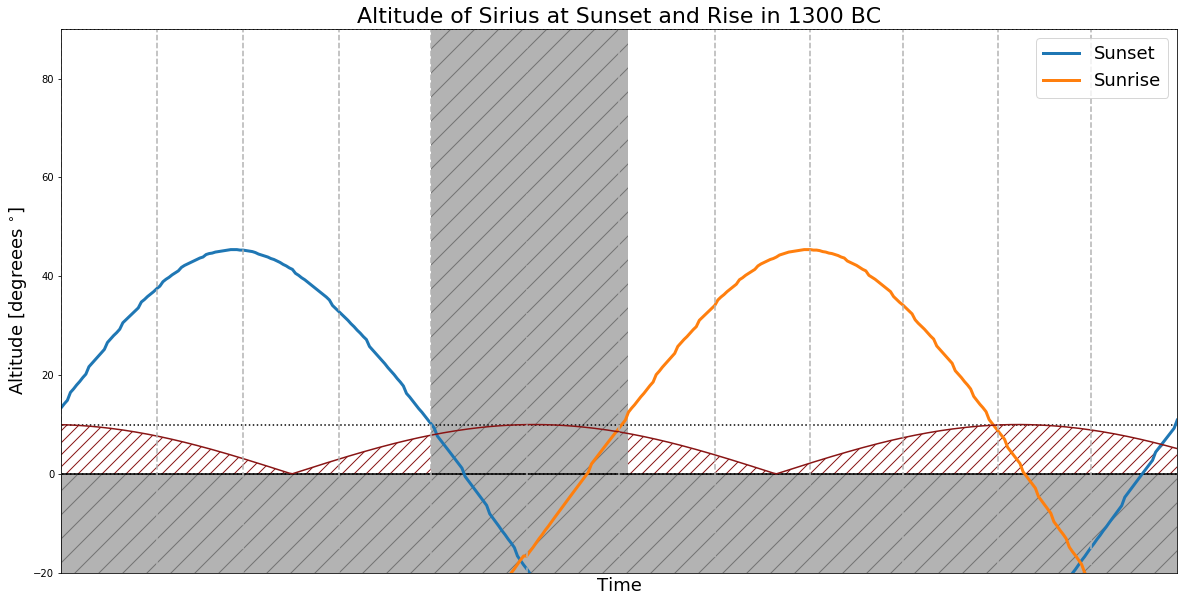

In [19]:
plt.figure(figsize=(20,10))

plt.plot(xdays, SirSetAlt,  linewidth=3.0, label = 'Sunset')
plt.plot(xdays, SirRiseAlt,  linewidth=3.0, label = 'Sunrise')

# landscaping
plt.hlines(0, 0, 366)
plt.hlines(10, 0, 366, linestyle = ':')

xdays = np.arange(1, len(SirMaxAlt)+1)
y1 = np.abs(10 * np.sin(0.02 * xdays + 29.9))

# this makes the "mountain" effect
plt.plot(xdays, y1, color="#891515")
plt.fill_between(xdays, 0, y1,  facecolor="none", hatch="//", edgecolor="#891515", linewidth=0.0)
plt.fill_between(xdays, -30, 0, facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)


# NESW LINES
ycoords = np.cumsum([-360, 90, 90, 90, 90, 90, 90, 90])
for yc in ycoords:
    plt.hlines(yc, 0, 366, linestyle = ':')

# month lines
xcoords = np.cumsum([1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # vertical month lines
for xc in xcoords:
    plt.axvline(x=xc, linestyle = '--', color='0.7' )

plt.fill_between(xdays[120 : 130 + 54 + 1], -360, 360,  facecolor="0.7", hatch="/", edgecolor="0.45", linewidth=0.0)    
    
    
# no x-label
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# niceties
plt.title('Altitude of Sirius at Sunset and Rise in 1300 BC', fontsize=22)    
plt.ylabel(r'Altitude [degreees $^{\circ}$]', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.xlim(1, 363)
plt.ylim(-20, 90)
plt.legend(fontsize = 18)
plt.show()